In [1]:
# python notebook for Make Your Own Neural Network
# code for a 3-layer neural network, and code for learning the MNIST dataset
# this version creates additional training examples by rotating each original by +/- 10 degrees
# xytywh, 2019/06/19

# 直接导入 part3_neural_network_mnist_data_with_rotations.ipynb 以及训练好的wih和who

In [2]:
# numpy provides arrays and useful functions for working with them
import numpy
# scipy.special for the sigmoid function expit()
import scipy.special
# scipy.ndimage for rotating image arrays
import scipy.ndimage
# helper to load data from PNG image files
import imageio
# library for plotting arrays
import matplotlib.pyplot
# ensure the plots are inside this notebook, not an external window
% matplotlib inline

In [3]:
# neural network class definition
class neuralNetwork:
    # initialise the neural network
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        # set number of nodes in each input, hidden, output layer
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes

        # link weight matrices, wih and who
        # weights inside the arrays are w_i_j, where link is from node i to node j in the next layer
        # w11 w21
        # w12 w22 etc 
        self.wih = numpy.random.normal(0.0, pow(self.inodes, -0.5), (self.hnodes, self.inodes))
        self.who = numpy.random.normal(0.0, pow(self.hnodes, -0.5), (self.onodes, self.hnodes))

        # learning rate
        self.lr = learningrate

        # activation function is the sigmoid function
        self.activation_function = lambda x: scipy.special.expit(x)

        pass

    # train the neural network
    def train(self, inputs_list, targets_list):
        # convert inputs list to 2d array
        inputs = numpy.array(inputs_list, ndmin=2).T
        targets = numpy.array(targets_list, ndmin=2).T

        # calculate signals into hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs)
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)

        # calculate signals into final output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)

        # output layer error is the (target - actual)
        output_errors = targets - final_outputs
        # hidden layer error is the output_errors, split by weights, recombined at hidden nodes
        hidden_errors = numpy.dot(self.who.T, output_errors)

        # update the weights for the links between the hidden and output layers
        self.who += self.lr * numpy.dot((output_errors * final_outputs * (1.0 - final_outputs)),
                                        numpy.transpose(hidden_outputs))

        # update the weights for the links between the input and hidden layers
        self.wih += self.lr * numpy.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)),
                                        numpy.transpose(inputs))

        pass

    # query the neural network
    def query(self, inputs_list):
        # convert inputs list to 2d array
        inputs = numpy.array(inputs_list, ndmin=2).T

        # calculate signals into hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs)
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)

        # calculate signals into final output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)

        return final_outputs


In [4]:
# number of input, hidden and output nodes
input_nodes = 784
hidden_nodes = 200
output_nodes = 10

# learning rate
learning_rate = 0.01

# create instance of neural network
n = neuralNetwork(input_nodes,hidden_nodes,output_nodes, learning_rate)

# 输入层和隐藏层之间的权重wih 以及 隐藏层和输出层之间的权重who直接导入文件
# part3_neural_network_mnist_data_with_rotations.ipynb 已经训练好的权重即可，无需再次训练
n.wih = numpy.load('wih.npy')
n.who = numpy.load('who.npy')

In [5]:
# load the mnist test data CSV file into a list
test_data_file = open("mnist_dataset/mnist_test_10000.csv", 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()

In [6]:
# test the neural network

# scorecard for how well the network performs, initially empty
scorecard = []

# go through all the records in the test data set
for record in test_data_list:
    # split the record by the ',' commas
    all_values = record.split(',')
    # correct answer is first value
    correct_label = int(all_values[0])
    # scale and shift the inputs
    inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    # query the network
    outputs = n.query(inputs)
    # the index of the highest value corresponds to the label
    label = numpy.argmax(outputs)
    # append correct or incorrect to list
    if (label == correct_label):
        # network's answer matches correct answer, add 1 to scorecard
        scorecard.append(1)
    else:
        # network's answer doesn't match correct answer, add 0 to scorecard
        scorecard.append(0)
      

In [7]:
# calculate the performance score, the fraction of correct answers
scorecard_array = numpy.asarray(scorecard)
print ("accuracy = ", scorecard_array.sum() / scorecard_array.size*100,"%")

accuracy =  97.87 %


loading ... my_own_images/2.png
[[7.49001481e-04]
 [3.14712429e-01]
 [9.83235319e-01]
 [1.84801649e-03]
 [2.60709030e-04]
 [4.16629884e-02]
 [3.25115713e-03]
 [6.37794550e-03]
 [8.51642414e-04]
 [3.43298892e-03]]
network says  2


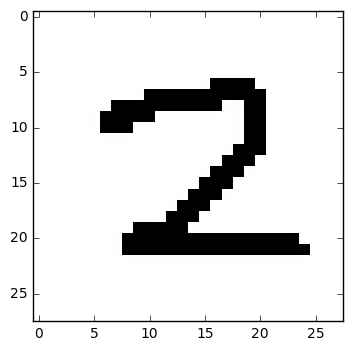

In [8]:
# test the neural network with our own images

# load image data from png files into an array
print ("loading ... my_own_images/2.png")
img_array = imageio.imread('my_own_images/2.png', as_gray=True)
    
# reshape from 28x28 to list of 784 values, invert values
img_data  = 255.0 - img_array.reshape(784)
    
# then scale data to range from 0.01 to 1.0
img_data = (img_data / 255.0 * 0.99) + 0.01

# plot image
matplotlib.pyplot.imshow(img_data.reshape(28,28), cmap='Greys', interpolation='None')

# query the network
outputs = n.query(img_data)
print (outputs)

# the index of the highest value corresponds to the label
label = numpy.argmax(outputs)
print("network says ", label)